# Analyse World Youth Unemployment

We need to analyse the dataset https://data.worldbank.org/indicator/SL.UEM.1524.ZS 

In [ ]:
import sys
import glob
import os
import pandas as pd
import numpy as np

# The glob read dont work, it read from homebrew folder.

Read csv file, The first 4 rows is unneccessary, so skip the first 4 rows

In [13]:
# the file name start API...

df = pd.read_csv('./Dataset/API_SL.UEM.1524.ZS_DS2_en_csv_v2_1984.csv', skiprows=4)

Check how many countries? 

In [14]:
print(len(df))

266


Check columns name and how many years?

In [15]:
# Check columns name

print(df.columns.tolist())

['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', 'Unnamed: 70']


In [16]:
# How many years?

year_cols = [col for col in df.columns if col.isdigit()]
print(len(year_cols))


66


Selecting the subset of data from the given dataset. 

Select only data from the last 5 years. 

In [17]:
last5 = year_cols[-5:]
df_sub = df[['Country Name', 'Country Code'] + last5]

check missing value

In [18]:
print(df_sub.isnull().sum())

Country Name     0
Country Code     0
2021            31
2022            32
2023            34
2024            36
2025            36
dtype: int64


dropping null values

In [19]:
df_sub = df_sub.dropna()

In [20]:
# Check missing value again

print(df_sub.isnull().sum())


Country Name    0
Country Code    0
2021            0
2022            0
2023            0
2024            0
2025            0
dtype: int64


The above code still have null value? we need to drop if any columns has null value

In [21]:
df_sub = df_sub.dropna(axis=1)

In [22]:
print(df_sub.isnull().sum())

Country Name    0
Country Code    0
2021            0
2022            0
2023            0
2024            0
2025            0
dtype: int64


check the type of data

In [23]:
print(df_sub.dtypes)

Country Name        str
Country Code        str
2021            float64
2022            float64
2023            float64
2024            float64
2025            float64
dtype: object


sorting 

In [24]:
# sorting by country name

df_sub = df_sub.sort_values('Country Name')

In [25]:
# show data

display(df_sub.head())

,Country Name,Country Code,2021,2022,2023,2024,2025
2,Afghanistan,AFG,16.013000,17.539000,17.494000,17.235000,16.785000
1,Africa Eastern and Southern,AFE,14.929679,13.938984,13.688151,13.525930,13.440296
3,Africa Western and Central,AFW,7.639468,5.905325,5.495737,5.469896,5.592238
5,Albania,ALB,27.089000,24.543000,25.410000,25.582000,25.567000
60,Algeria,DZA,33.828000,31.359000,29.995000,29.884000,29.444000


Setting the index

set the `Country Code` column as an index 

In [26]:
data1 = df_sub.set_index('Country Code')

In [27]:
display(data1.head())

,Country Name,2021,2022,2023,2024,2025
Country Code,,,,,,
AFG,Afghanistan,16.013000,17.539000,17.494000,17.235000,16.785000
AFE,Africa Eastern and Southern,14.929679,13.938984,13.688151,13.525930,13.440296
AFW,Africa Western and Central,7.639468,5.905325,5.495737,5.469896,5.592238
ALB,Albania,27.089000,24.543000,25.410000,25.582000,25.567000
DZA,Algeria,33.828000,31.359000,29.995000,29.884000,29.444000


Check info of the descriptive statistic of the data in all 10 years

In [28]:
display(data1.describe())

,2021,2022,2023,2024,2025
count,230.000000,230.000000,230.000000,230.000000,230.000000
mean,17.330818,15.675822,15.068604,15.089302,15.110341
std,11.763506,11.032072,10.685633,10.619414,10.651470
min,0.693000,0.397000,0.398000,0.391000,0.457000
25%,9.712250,8.472750,8.460250,8.660223,8.725177
50%,14.822213,13.408000,12.924878,12.864500,12.963500
75%,21.806250,19.271254,18.440286,18.944975,19.172582
max,79.377000,76.609000,76.393000,76.494000,76.766000


Convert pandas array to numpy array

In [32]:
data_np = data1.to_numpy()
print(data_np)

[['Afghanistan' 16.013 17.539 17.494 17.235 16.785]
 ['Africa Eastern and Southern' 14.92967892072 13.9389837852283
  13.6881505182961 13.525930432504 13.4402964847064]
 ['Africa Western and Central' 7.6394676570899 5.90532525234878
  5.49573729735676 5.46989631509748 5.59223786657231]
 ...
 ['Yemen, Rep.' 34.097 32.454 32.104 32.172 32.598]
 ['Zambia' 9.364 9.849 10.038 10.102 10.47]
 ['Zimbabwe' 15.208 16.984 15.332 15.429 15.548]]


Check the descriptive statistic of year 2012 

In [ ]:
# year 12 is not available since we cut to take only 5 last year

print(data1['2021'].describe())

count    230.000000
mean      17.330818
std       11.763506
min        0.693000
25%        9.712250
50%       14.822213
75%       21.806250
max       79.377000
Name: 2021, dtype: float64


and plot box plot year 2012

```
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
 
# Creating dataset

data = data1['2012'].to_numpy()
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()
```

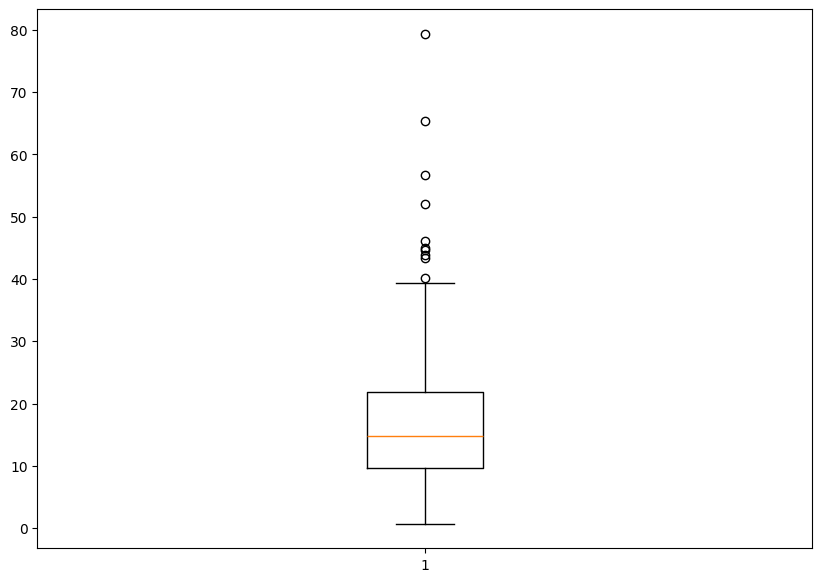

In [50]:
import matplotlib.pyplot as plt

data = data1['2021'].to_numpy()

fig = plt.figure(figsize=(10, 7))
plt.boxplot(data)
plt.show()

Add new column as average of 10 years in each rows and set the name as `data["10years_avg"]`

In [51]:
year_cols_sub = [col for col in data1.columns if col.isdigit()]
data1['10years_avg'] = data1[year_cols_sub].mean(axis=1)

In [52]:
display(data1.head())

,Country Name,2021,2022,2023,2024,2025,10years_avg
Country Code,,,,,,,
AFG,Afghanistan,16.013000,17.539000,17.494000,17.235000,16.785000,17.013200
AFE,Africa Eastern and Southern,14.929679,13.938984,13.688151,13.525930,13.440296,13.904608
AFW,Africa Western and Central,7.639468,5.905325,5.495737,5.469896,5.592238,6.020533
ALB,Albania,27.089000,24.543000,25.410000,25.582000,25.567000,25.638200
DZA,Algeria,33.828000,31.359000,29.995000,29.884000,29.444000,30.902000


Plotting the 10years_avg unemployment data using bar graph where x axis is countries and y axis is 10 years avg of unemployment rate

```
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(120,40))

plt.bar(countries, avg10y, color ='maroon')

# ax.bar(countries, avg10y, align = 'edge')

# plt.xlabel('countries',fontsize = 60)
# plt.ylabel('10 years avg unemployment rate',fontsize = 60)
plt.xlabel('countries')
plt.ylabel('10 years avg unemployment rate')
plt.xticks(rotation = 70, fontsize = 20)
plt.yticks(rotation = 'vertical', fontsize = 20)
plt.title("Unemployment average of the last 10 year (2012-2022)")

plt.show()

```

#### Perform the data analysis and plotting summary of them

- list all countries where unemployment is greater than or equal to 25% in 2022

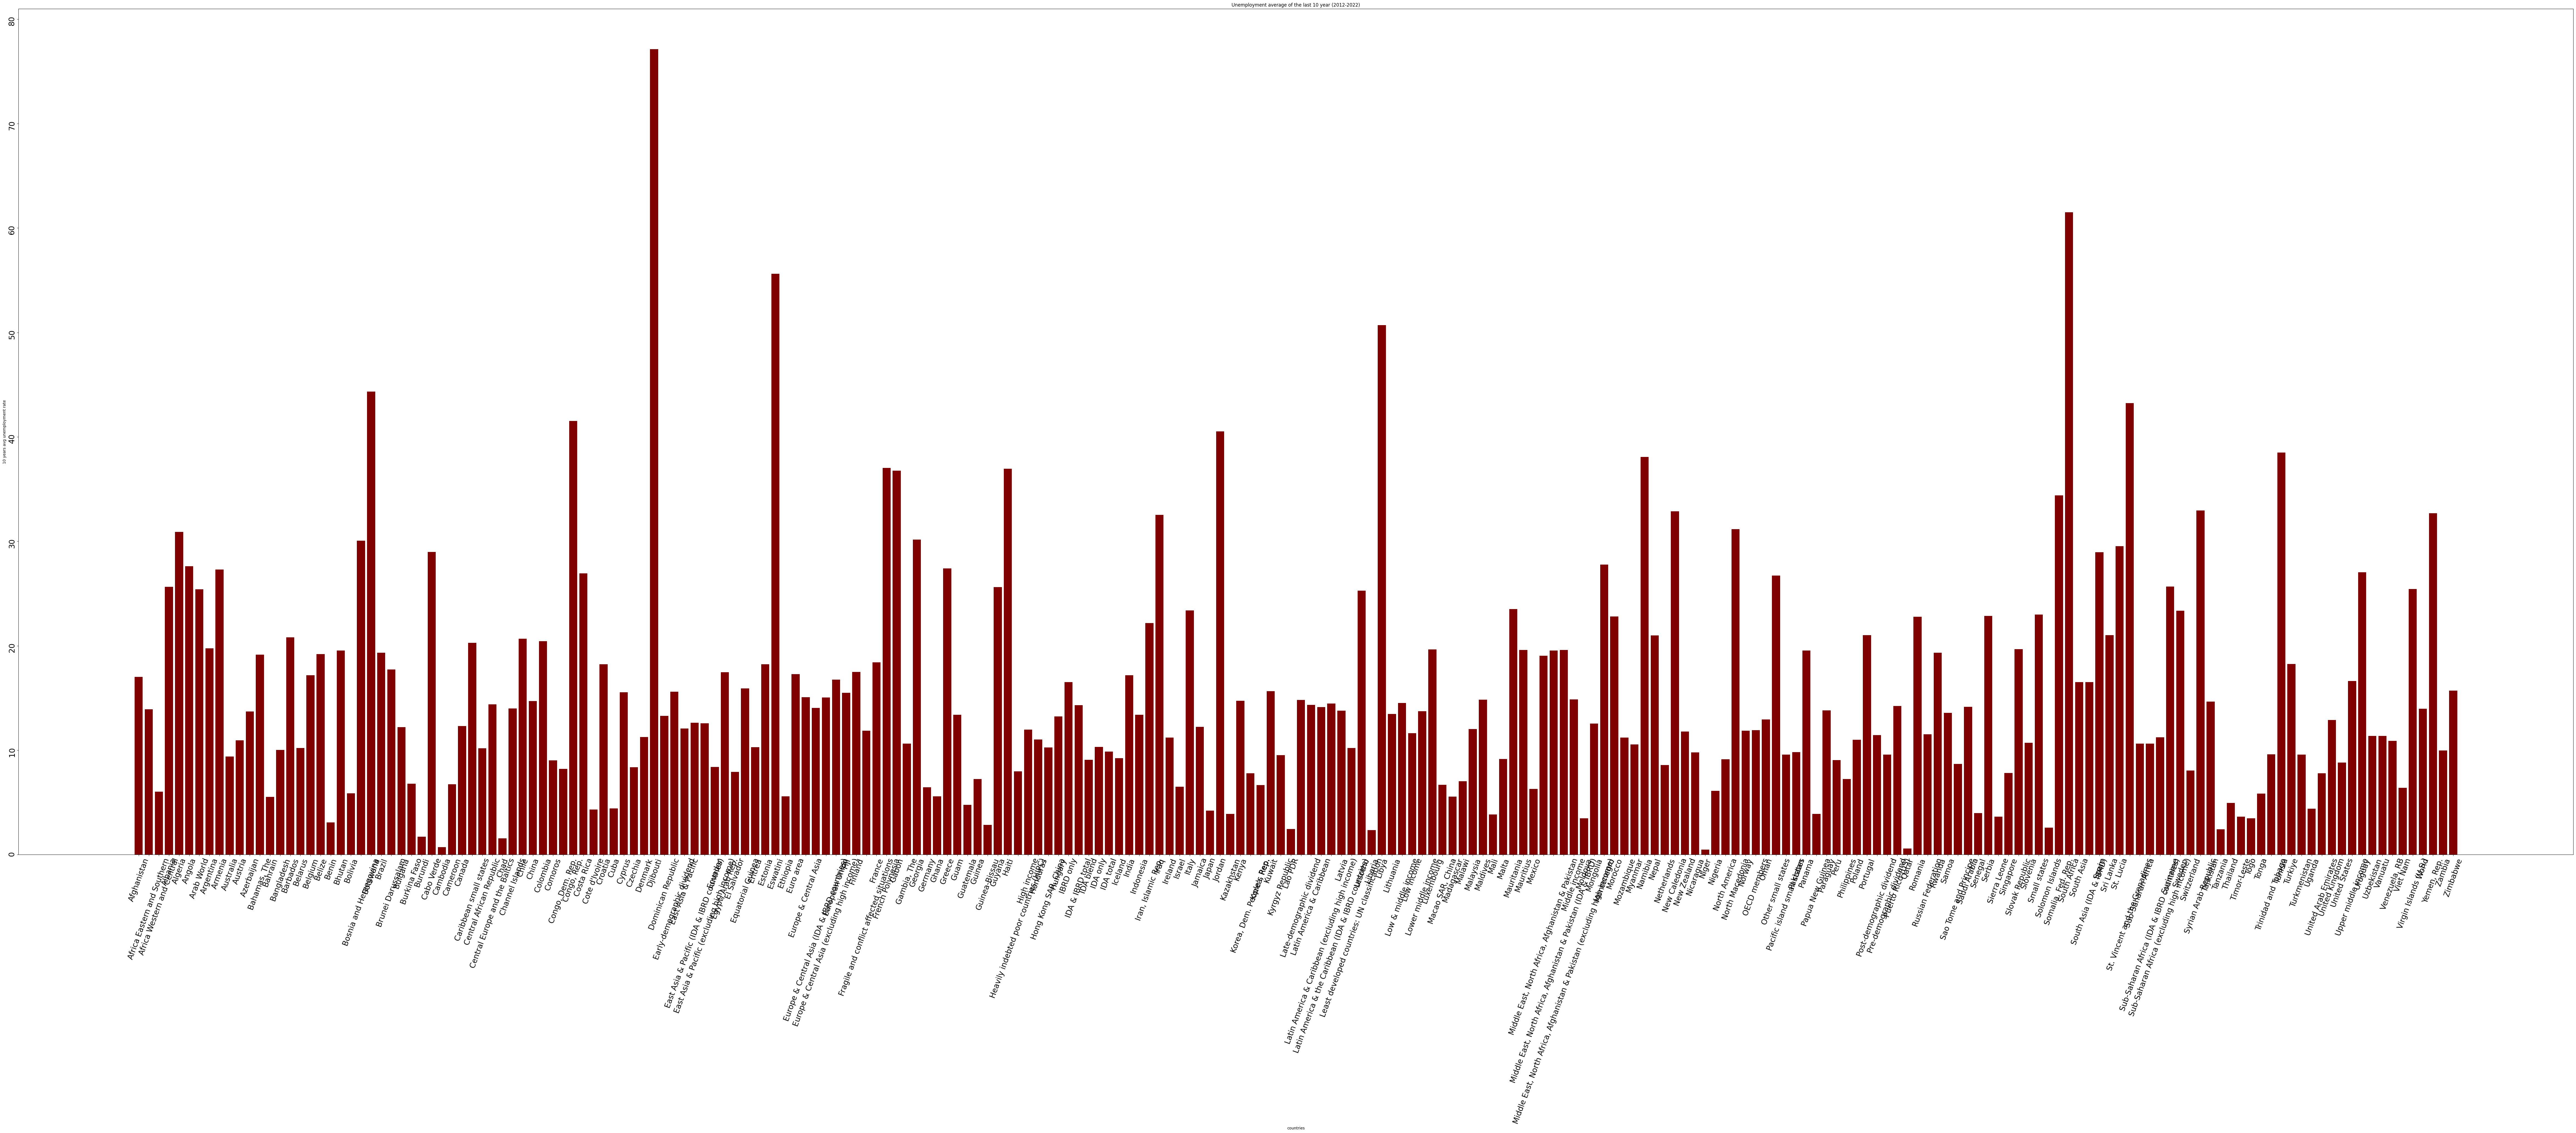

In [53]:
countries = data1['Country Name'].tolist()
avg10y = data1['10years_avg'].tolist()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(120,40))
plt.bar(countries, avg10y, color='maroon')
plt.xlabel('countries')
plt.ylabel('10 years avg unemployment rate')
plt.xticks(rotation=70, fontsize=20)
plt.yticks(rotation='vertical', fontsize=20)
plt.title("Unemployment average of the last 10 year (2012-2022)")
plt.show()

- list all countries where unemployment is less than or equal to 1% in 2022

In [54]:
print(data1[data1['2022'] >= 25]['Country Name'])

Country Code
DZA                           Algeria
AGO                            Angola
ARM                           Armenia
BTN                            Bhutan
BIH            Bosnia and Herzegovina
BWA                          Botswana
CPV                        Cabo Verde
COG                       Congo, Rep.
CRI                        Costa Rica
DJI                          Djibouti
SWZ                          Eswatini
PYF                  French Polynesia
GAB                             Gabon
GEO                           Georgia
GRC                            Greece
HTI                             Haiti
IRQ                              Iraq
JOR                            Jordan
LSO                           Lesotho
LBY                             Libya
MNE                        Montenegro
NAM                           Namibia
NCL                     New Caledonia
MKD                   North Macedonia
OSS                Other small states
SOM                Somalia, Fed. Rep.

- list top 10 countries that have an average high rate of unemployment from 2012-2022

In [55]:
top10_high = data1.nlargest(10, '10years_avg')[['Country Name', '10years_avg']]
print(top10_high)

                                Country Name  10years_avg
Country Code                                             
DJI                                 Djibouti      77.1278
ZAF                             South Africa      61.5128
SWZ                                 Eswatini      55.6162
LBY                                    Libya      50.6868
BWA                                 Botswana      44.3254
VCT           St. Vincent and the Grenadines      43.2332
COG                              Congo, Rep.      41.5300
JOR                                   Jordan      40.5312
TUN                                  Tunisia      38.5088
NAM                                  Namibia      38.0656


- plot top 10 countries that have an average high rate of unemployment from 2012-2022 using bar graph

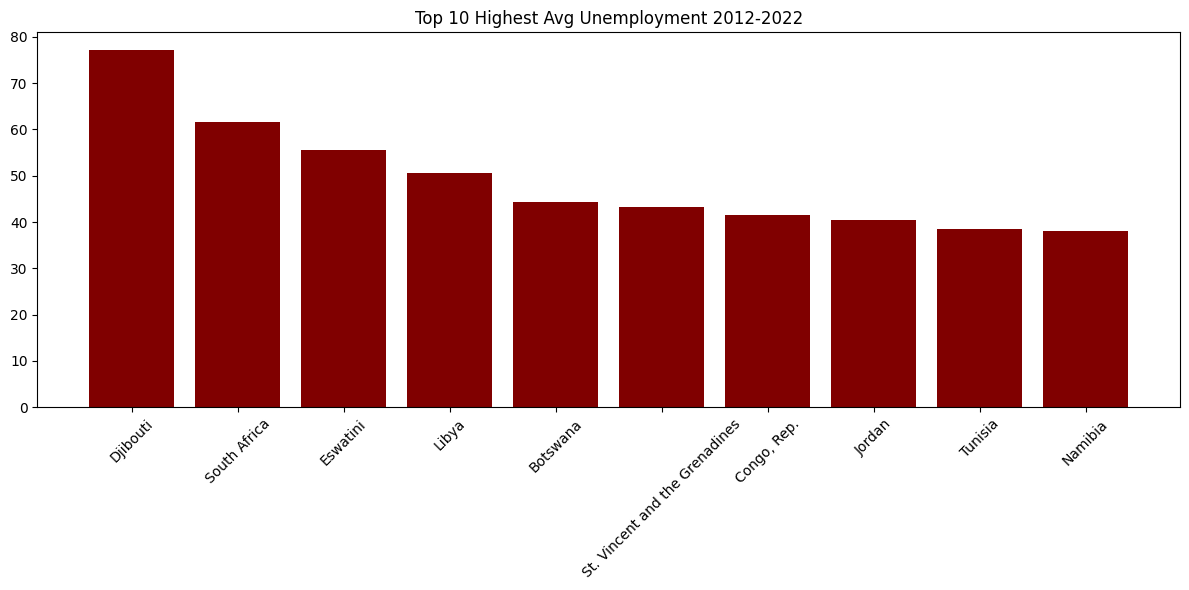

In [56]:
plt.figure(figsize=(12, 6))
plt.bar(top10_high['Country Name'], top10_high['10years_avg'], color='maroon')
plt.xticks(rotation=45)
plt.title('Top 10 Highest Avg Unemployment 2012-2022')
plt.tight_layout()
plt.show()


- list top 10 countries that have an average high rate of unemployment from 2012-2022

In [57]:
top10_low = data1.nsmallest(10, '10years_avg')[['Country Name', '10years_avg']]
print(top10_low)

                 Country Name  10years_avg
Country Code                              
NER                     Niger       0.4722
QAT                     Qatar       0.5916
KHM                  Cambodia       0.7270
TCD                      Chad       1.5676
BDI                   Burundi       1.7100
LBR                   Liberia       2.3564
TZA                  Tanzania       2.4300
LAO                   Lao PDR       2.4496
SLB           Solomon Islands       2.5874
GNB             Guinea-Bissau       2.8526


- plot top 10 countries that have an average low rate of unemployment from 2012-2022 using bar graph

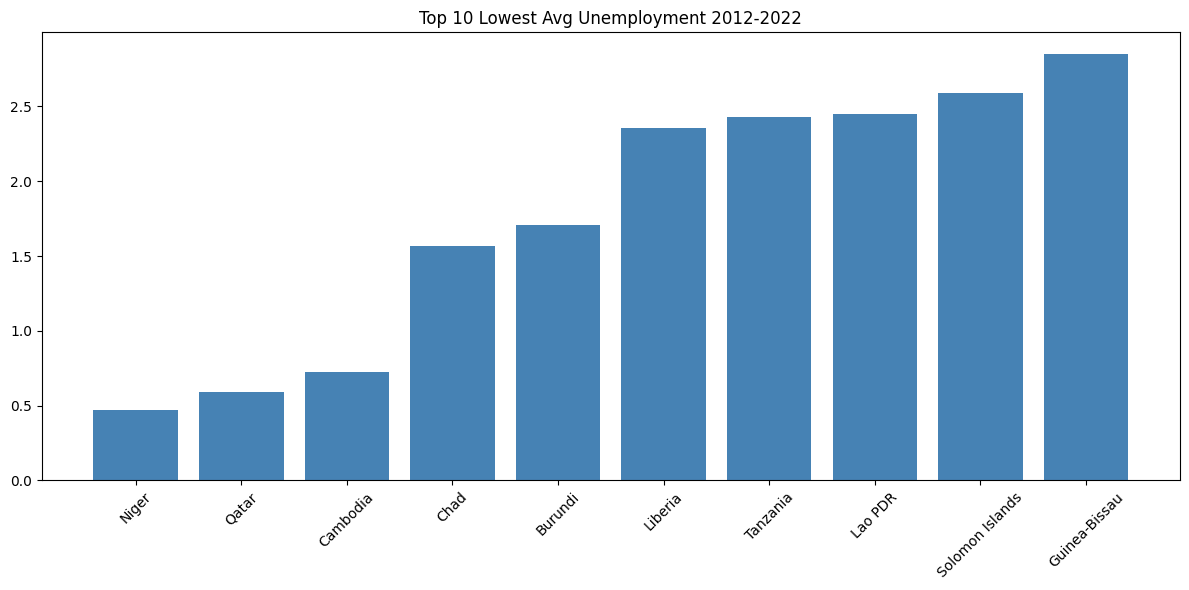

In [58]:
plt.figure(figsize=(12, 6))
plt.bar(top10_low['Country Name'], top10_low['10years_avg'], color='steelblue')
plt.xticks(rotation=45)
plt.title('Top 10 Lowest Avg Unemployment 2012-2022')
plt.tight_layout()
plt.show()

#### Now we want to see the unemployment rate in Covid

So we add another column to see the different 2019 and 2020

- Add new column `data['covid_year_dif']`


`data1['covid_year_dif'] = data1['2020'] - data1['2019']`

In [60]:
data1['covid_year_dif'] = data1['2022'] - data1['2021']

In [61]:
display(data1[['Country Name', 'covid_year_dif']].head())

,Country Name,covid_year_dif
Country Code,,
AFG,Afghanistan,1.526000
AFE,Africa Eastern and Southern,-0.990695
AFW,Africa Western and Central,-1.734142
ALB,Albania,-2.546000
DZA,Algeria,-2.469000



- list top 10 countries that have an high covid impact of unemployment

In [62]:
top10_covid_high = data1.nlargest(10, 'covid_year_dif')[['Country Name', 'covid_year_dif']]
print(top10_covid_high)

                   Country Name  covid_year_dif
Country Code                                   
BTN                      Bhutan           6.568
OMN                        Oman           5.465
KEN                       Kenya           3.256
GTM                   Guatemala           2.485
CHN                       China           2.269
BRN           Brunei Darussalam           2.061
SWZ                    Eswatini           1.805
MOZ                  Mozambique           1.783
ZWE                    Zimbabwe           1.776
EST                     Estonia           1.770



- Plot top 10 countries that have an high covid impact of unemployment

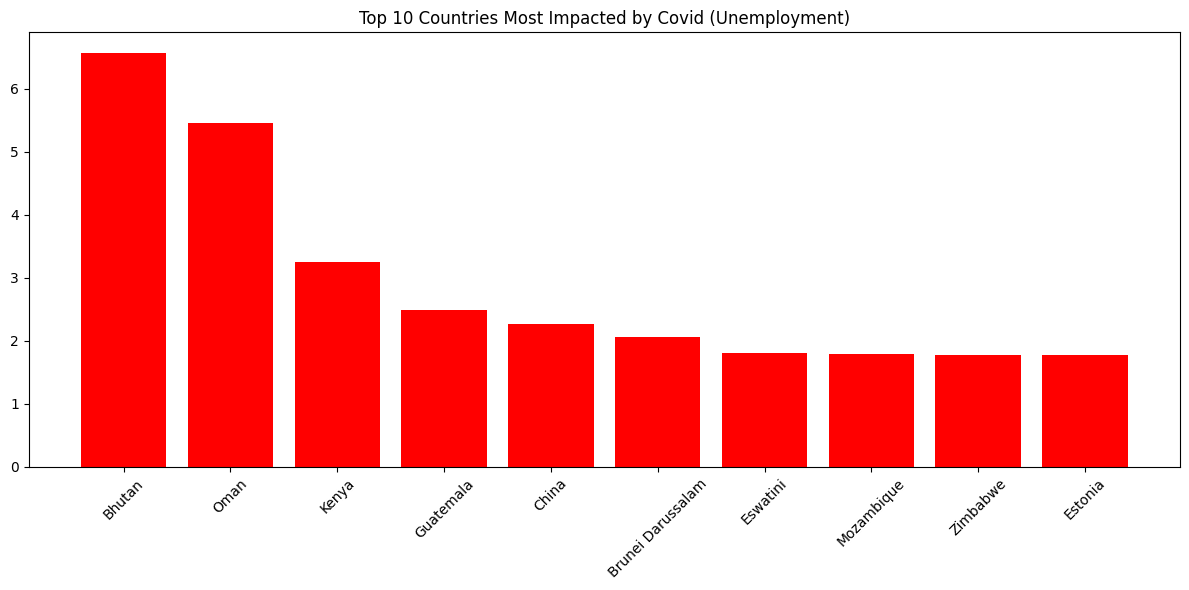

In [63]:
plt.figure(figsize=(12, 6))
plt.bar(top10_covid_high['Country Name'], top10_covid_high['covid_year_dif'], color='red')
plt.xticks(rotation=45)
plt.title('Top 10 Countries Most Impacted by Covid (Unemployment)')
plt.tight_layout()
plt.show()


- list top 10 countries that have an less covid impact of unemployment

In [64]:
top10_covid_low = data1.nsmallest(10, 'covid_year_dif')[['Country Name', 'covid_year_dif']]
print(top10_covid_low)

             Country Name  covid_year_dif
Country Code                             
LCA             St. Lucia         -14.158
CRI            Costa Rica          -8.483
MNE            Montenegro          -7.604
BRA                Brazil          -7.579
BRB              Barbados          -7.224
URY               Uruguay          -6.487
IRL               Ireland          -6.223
ITA                 Italy          -5.961
ESP                 Spain          -5.286
BGR              Bulgaria          -5.119



- Plot top 10 countries that have an less covid impact of unemployment

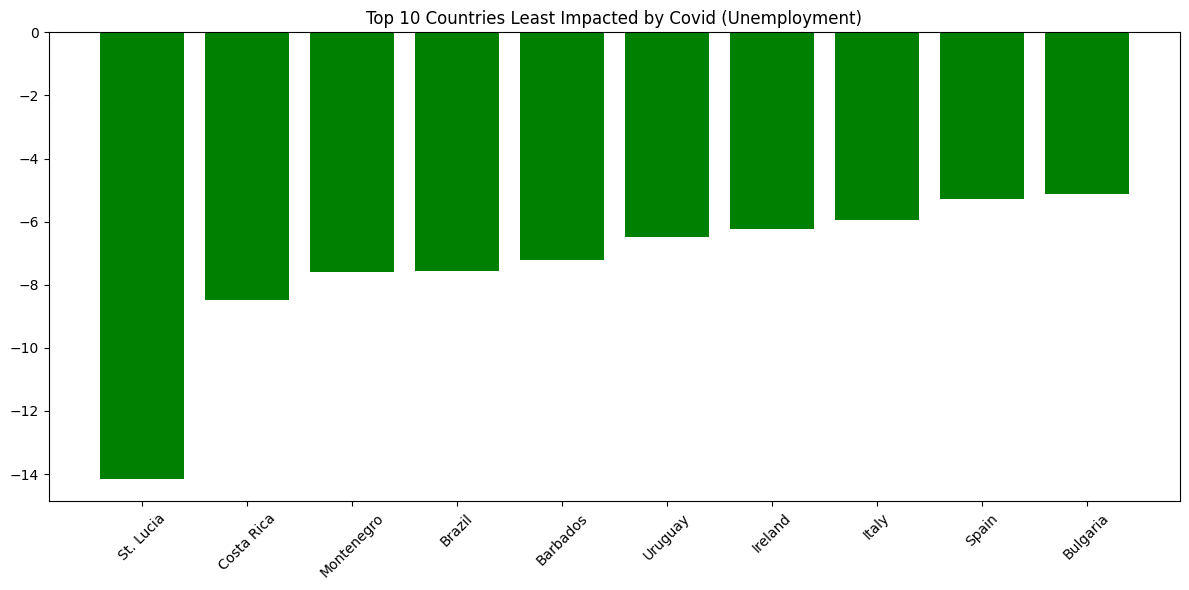

In [66]:
plt.figure(figsize=(12, 6))
plt.bar(top10_covid_low['Country Name'], top10_covid_low['covid_year_dif'], color='green')
plt.xticks(rotation=45)
plt.title('Top 10 Countries Least Impacted by Covid (Unemployment)')
plt.tight_layout()
plt.show()

# Extra Score (Optional)

Analyse data Poverty headcount: https://data.worldbank.org/indicator/SI.POV.DDAY?locations=1W&start=1984&view=chart

What can you check and summary this data?